In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/star_classification.csv')
df_data = df[["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]]


#convert class to numbers
df_target = df[["class"]]
df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

#divide data
split_index1 = int(0.6* len(df))
split_index2 = int(0.8* len(df))

train_inputs = df_data[:split_index1]  # First 60% for training
val_inputs = df_data[split_index1:split_index2] #next 20% validation
test_inputs = df_data[split_index2:]  #last 20% for testing

train_targets = df_target[:split_index1]
val_targets = df_target[split_index1:split_index2]
test_targets = df_target[split_index2:]

#convert to numpy array
train_input_np = train_inputs.to_numpy()
val_input_np = val_inputs.to_numpy()
test_input_np = test_inputs.to_numpy()

train_target_np = train_targets.to_numpy()
val_target_np = val_targets.to_numpy()
test_target_np = test_targets.to_numpy()

#convert to numpy stack
train_input_stack = np.vstack(train_input_np)
val_input_stack = np.vstack(val_input_np)
test_input_stack = np.vstack(test_input_np)

train_target_stack = np.vstack(train_target_np)
val_target_stack = np.vstack(val_target_np)
test_target_stack = np.vstack(test_target_np)


<ipython-input-2-4e29ccedc3ef>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})
<ipython-input-2-4e29ccedc3ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


In [3]:
# df["z"].unique()

train_inputs = train_input_stack.astype(np.float32)
train_targets = train_target_stack.astype(np.float32)

val_inputs = val_input_stack.astype(np.float32)
val_targets = val_target_stack.astype(np.float32)

test_inputs = test_input_stack.astype(np.float32)
test_targets = test_target_stack.astype(np.float32)



In [4]:
df_data

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


In [5]:
(train_inputs)

array([[135.6891   ,  32.494633 ,  23.87882  , ...,  19.16573  ,
         18.79371  ,   0.6347936],
       [144.8261   ,  31.274185 ,  24.77759  , ...,  21.16812  ,
         21.61427  ,   0.779136 ],
       [142.1888   ,  35.582443 ,  25.26307  , ...,  19.34857  ,
         18.94827  ,   0.6441945],
       ...,
       [174.91995  ,  52.271618 ,  22.28294  , ...,  19.2916   ,
         18.8      ,   0.50591  ],
       [184.6338   ,  52.710712 ,  26.06024  , ...,  19.6161   ,
         19.07299  ,   0.5994404],
       [150.09737  ,   3.7487898,  24.12138  , ...,  19.59054  ,
         19.17026  ,   0.5362175]], dtype=float32)

In [6]:
model = keras.Sequential([
     layers.Dense(16, activation="relu"),
     layers.Dense(16, activation = 'relu'),
     layers.Dense(8, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(train_inputs, train_targets,
                    epochs=7,
                    batch_size=16,
                    validation_data = (val_inputs, val_targets))
history_dict = history.history
history_dict.keys()

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5760 - loss: 6.4765 - val_accuracy: 0.8191 - val_loss: 0.4007
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8322 - loss: 0.3934 - val_accuracy: 0.9085 - val_loss: 0.2594
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8848 - loss: 0.2944 - val_accuracy: 0.8274 - val_loss: 0.3298
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9029 - loss: 0.2581 - val_accuracy: 0.8820 - val_loss: 0.3122
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9135 - loss: 0.2372 - val_accuracy: 0.9493 - val_loss: 0.1668
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9218 - loss: 0.2228 - val_accuracy: 0.9388 - val_loss: 0.2081
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9242 - loss: 0.2206 - val_accuracy: 0.9467 - val_loss: 0.1717


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

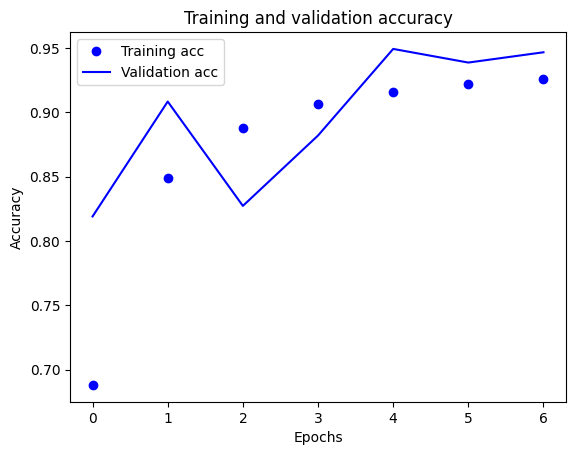

In [7]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(acc, "bo", label="Training acc")
plt.plot( val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# making a function to rerun the model

## ETF

Loading and processing the data.

In [8]:
df = pd.read_csv('/content/star_classification.csv')
df_data = df[["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]]


#convert class to numbers
df_target = df[["class"]]
df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

#divide data
split_index1 = int(0.6* len(df))
split_index2 = int(0.8* len(df))

train_inputs = df_data[:split_index1]  # First 60% for training
val_inputs = df_data[split_index1:split_index2] #next 20% validation
test_inputs = df_data[split_index2:]  #last 20% for testing

train_targets = df_target[:split_index1]
val_targets = df_target[split_index1:split_index2]
test_targets = df_target[split_index2:]

#convert to numpy array
train_input_np = train_inputs.to_numpy()
val_input_np = val_inputs.to_numpy()
test_input_np = test_inputs.to_numpy()

train_target_np = train_targets.to_numpy()
val_target_np = val_targets.to_numpy()
test_target_np = test_targets.to_numpy()

#convert to numpy stack
train_input_stack = np.vstack(train_input_np)
val_input_stack = np.vstack(val_input_np)
test_input_stack = np.vstack(test_input_np)

train_target_stack = np.vstack(train_target_np)
val_target_stack = np.vstack(val_target_np)
test_target_stack = np.vstack(test_target_np)

# convert to floats
train_inputs = train_input_stack.astype(np.float32)
train_targets = train_target_stack.astype(np.float32)

val_inputs = val_input_stack.astype(np.float32)
val_targets = val_target_stack.astype(np.float32)

test_inputs = test_input_stack.astype(np.float32)
test_targets = test_target_stack.astype(np.float32)

<ipython-input-8-0b0679614b37>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})
<ipython-input-8-0b0679614b37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


## defining the function

!!!!! note for lorraine--- go back later and implement kwargs instead

In [12]:
def stellar_model(intermediate_layers, layer_units, optimize, loss_function, my_epochs, batchsize):

    #define intermediate layers and layer units for model
    layers_for_model = []
    for i in range(intermediate_layers):
      layers_for_model.append(layers.Dense(layer_units, activation="relu"))

    # layers_for_model = []
    # for i in range(intermediate_layers):
    #   layers_for_model.append(layers.Dense(layer_units, activation="relu"))

    # model = keras.Sequential([
    #  layers.Dense(16, activation="relu"),
    #  layers.Dense(16, activation = 'relu'),
    #  layers.Dense(8, activation="softmax")
    # ])

    model = keras.Sequential(layers_for_model + [layers.Dense(8, activation="softmax")])

    model.compile(optimizer=optimize,
                  loss=loss_function,
                  metrics=["accuracy"])


    history = model.fit(train_inputs, train_targets,
                        epochs=my_epochs,
                        batch_size=16,
                        validation_data = (val_inputs, val_targets))

    history_dict = history.history
    history_dict.keys()

    history_dict = history.history
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]

    plt.plot(acc, "bo", label="Training acc")
    plt.plot( val_acc, "b", label="Validation acc")

    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    print("Highest Validation Accuracy: ", max(val_acc))



## Building a Function to Generate the Model

### testing the function

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5924 - loss: 1.9691 - val_accuracy: 0.7750 - val_loss: 0.6171
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8147 - loss: 0.4294 - val_accuracy: 0.8419 - val_loss: 0.6479
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8598 - loss: 0.3454 - val_accuracy: 0.8819 - val_loss: 0.6603
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8829 - loss: 0.3055 - val_accuracy: 0.8992 - val_loss: 0.6509
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8961 - loss: 0.2802 - val_accuracy: 0.9375 - val_loss: 0.5945
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9087 - loss: 0.2590 - val_accuracy: 0.9517 - val_loss: 0.5541
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9179 - loss: 0.2387 - val_accuracy: 0.9408 - val_loss: 0.5550


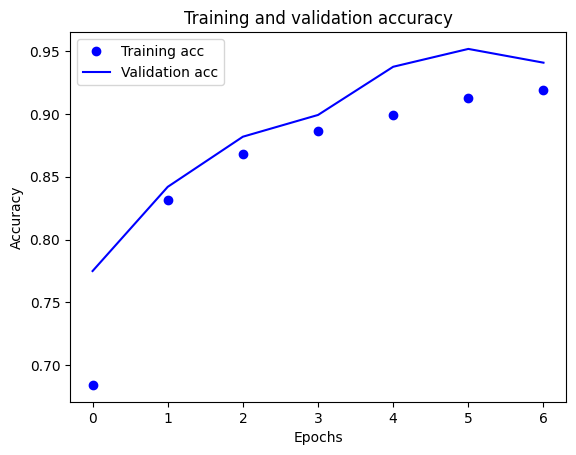

Highest Validation Accuracy:  0.95169997215271


In [13]:
default = stellar_model(2, 16, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5673 - loss: 2.0369 - val_accuracy: 0.8026 - val_loss: 0.6659
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8154 - loss: 0.4286 - val_accuracy: 0.8576 - val_loss: 0.5653
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8625 - loss: 0.3392 - val_accuracy: 0.9157 - val_loss: 0.5318
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8852 - loss: 0.2970 - val_accuracy: 0.8407 - val_loss: 0.5574
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9016 - loss: 0.2691 - val_accuracy: 0.9469 - val_loss: 0.4677
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9126 - loss: 0.2431 - val_accuracy: 0.9519 - val_loss: 0.4512
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9212 - loss: 0.2267 - val_accuracy: 0.9372 - val_loss: 0.4488


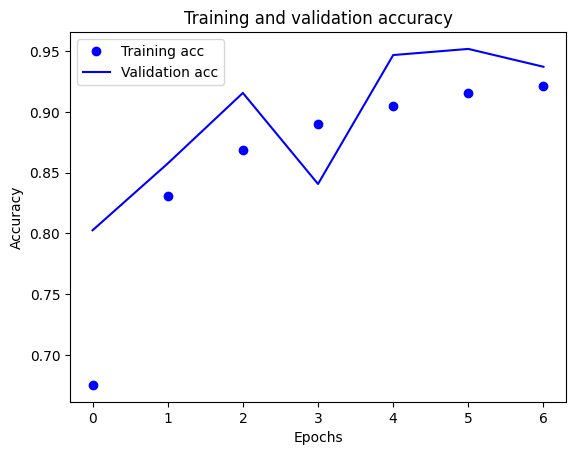

Highest Validation Accuracy:  0.9519000053405762


In [17]:
#1 dense Layer
stellar_model(1, 16, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6234 - loss: 0.9171 - val_accuracy: 0.7483 - val_loss: 0.6274
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8307 - loss: 0.3975 - val_accuracy: 0.9017 - val_loss: 0.3913
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8673 - loss: 0.3233 - val_accuracy: 0.8864 - val_loss: 0.4180
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8904 - loss: 0.2878 - val_accuracy: 0.9073 - val_loss: 0.3862
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9026 - loss: 0.2638 - val_accuracy: 0.9440 - val_loss: 0.3446
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9112 - loss: 0.2467 - val_accuracy: 0.9421 - val_loss: 0.2687
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9172 - loss: 0.2373 - val_accuracy: 0.9343 - val_loss: 0.2695


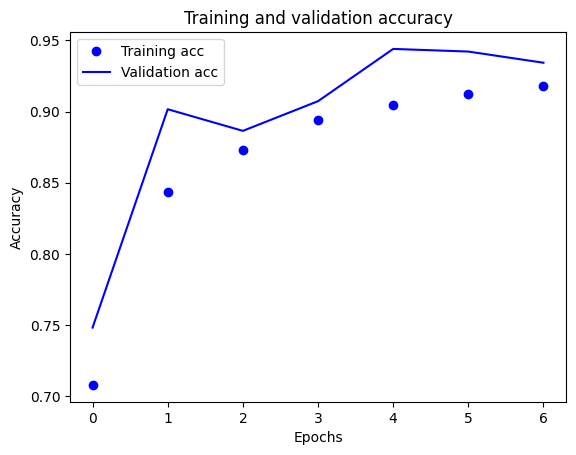

Highest Validation Accuracy:  0.9440000057220459


In [14]:
#3 dense Layers
stellar_model(3, 16, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6012 - loss: 1.0868 - val_accuracy: 0.7671 - val_loss: 0.5363
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8003 - loss: 0.4572 - val_accuracy: 0.9190 - val_loss: 0.2558
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8644 - loss: 0.3326 - val_accuracy: 0.9227 - val_loss: 0.2433
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8940 - loss: 0.2764 - val_accuracy: 0.9120 - val_loss: 0.2424
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9069 - loss: 0.2560 - val_accuracy: 0.8749 - val_loss: 0.3228
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9150 - loss: 0.2381 - val_accuracy: 0.9359 - val_loss: 0.2006
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9213 - loss: 0.2319 - val_accuracy: 0.9328 - val_loss: 0.2048
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9263 - loss: 0.2

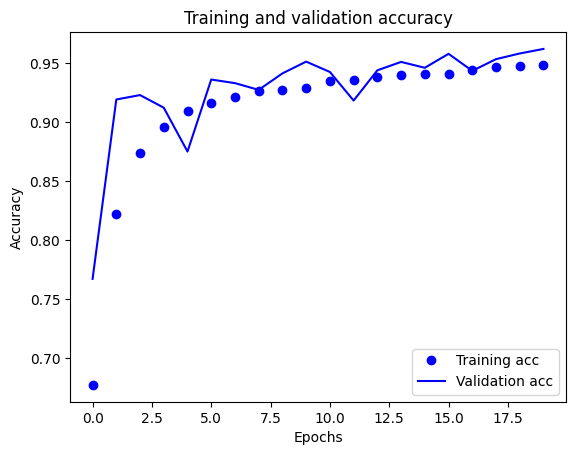

Highest Validation Accuracy:  0.9617499709129333


In [38]:
#4 dense Layers
stellar_model(4, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6022 - loss: 1.2053 - val_accuracy: 0.7520 - val_loss: 0.5968
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7465 - loss: 0.5855 - val_accuracy: 0.8019 - val_loss: 0.4107
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8095 - loss: 0.4205 - val_accuracy: 0.9023 - val_loss: 0.2655
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8730 - loss: 0.3169 - val_accuracy: 0.9151 - val_loss: 0.2374
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8886 - loss: 0.2897 - val_accuracy: 0.8962 - val_loss: 0.2571
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8981 - loss: 0.2743 - val_accuracy: 0.9232 - val_loss: 0.2244
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9052 - loss: 0.2659 - val_accuracy: 0.8607 - val_loss: 0.2951
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9077 - loss: 0.26

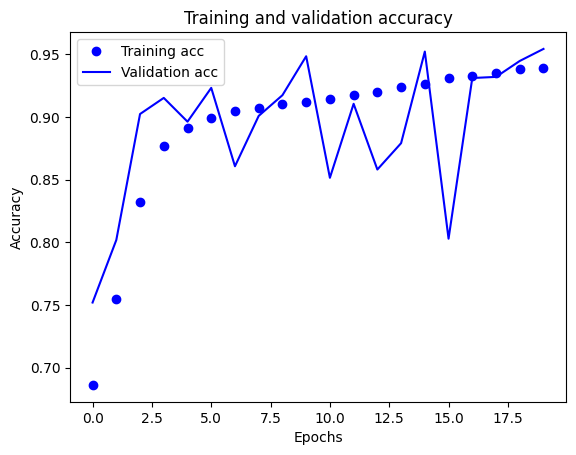

Highest Validation Accuracy:  0.954200029373169


In [39]:
#5 dense Layers
stellar_model(5, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

#Intermediate Layer Result: 1 Layer had highest val accuracy
##2 Layers was also very high

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5221 - loss: 4.2579 - val_accuracy: 0.7466 - val_loss: 0.6937
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7512 - loss: 0.5315 - val_accuracy: 0.8101 - val_loss: 0.5688
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8226 - loss: 0.4077 - val_accuracy: 0.7879 - val_loss: 0.5896
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8668 - loss: 0.3342 - val_accuracy: 0.9079 - val_loss: 0.5225
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8934 - loss: 0.2856 - val_accuracy: 0.8790 - val_loss: 0.5342
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9068 - loss: 0.2552 - val_accuracy: 0.9427 - val_loss: 0.4785
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9177 - loss: 0.2300 - val_accuracy: 0.9484 - val_loss: 0.5010
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9275 - loss: 0.21

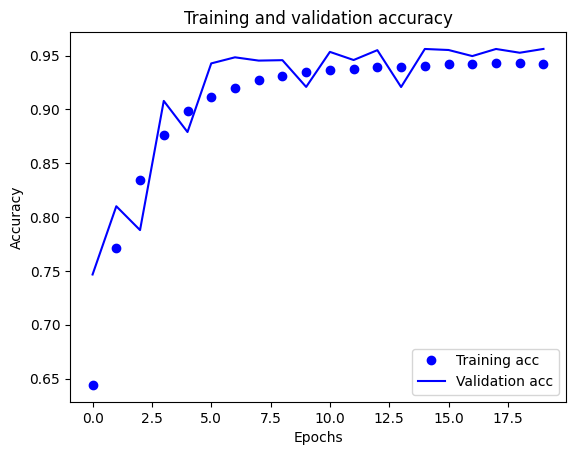

Highest Validation Accuracy:  0.9562000036239624


In [40]:
#8 unit Layers
stellar_model(2, 8, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6199 - loss: 1.2336 - val_accuracy: 0.7793 - val_loss: 0.8885
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8284 - loss: 0.4064 - val_accuracy: 0.8616 - val_loss: 0.7422
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8768 - loss: 0.3157 - val_accuracy: 0.9345 - val_loss: 0.7161
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9007 - loss: 0.2706 - val_accuracy: 0.9364 - val_loss: 0.6866
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9106 - loss: 0.2515 - val_accuracy: 0.9120 - val_loss: 0.7185
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9171 - loss: 0.2380 - val_accuracy: 0.9463 - val_loss: 0.7218
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9223 - loss: 0.2286 - val_accuracy: 0.9015 - val_loss: 0.8108


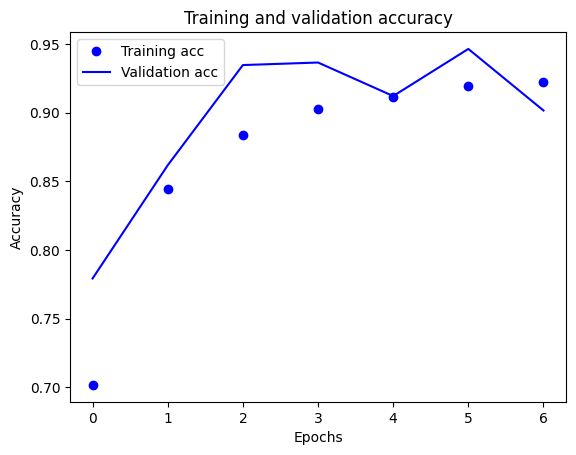

Highest Validation Accuracy:  0.9463000297546387


In [19]:
#32 unit Layers
stellar_model(2, 32, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

##Best Model so Far
Highest Validation Accuracy:  0.9538499712944031

stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 16)


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5921 - loss: 1.2404 - val_accuracy: 0.8562 - val_loss: 0.3525
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8383 - loss: 0.3819 - val_accuracy: 0.8126 - val_loss: 0.5105
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8857 - loss: 0.2974 - val_accuracy: 0.9014 - val_loss: 0.2537
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9096 - loss: 0.2510 - val_accuracy: 0.9309 - val_loss: 0.2270
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9233 - loss: 0.2283 - val_accuracy: 0.9457 - val_loss: 0.1660
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9290 - loss: 0.2132 - val_accuracy: 0.9463 - val_loss: 0.1784
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9329 - loss: 0.2116 - val_accuracy: 0.9538 - val_loss: 0.1734


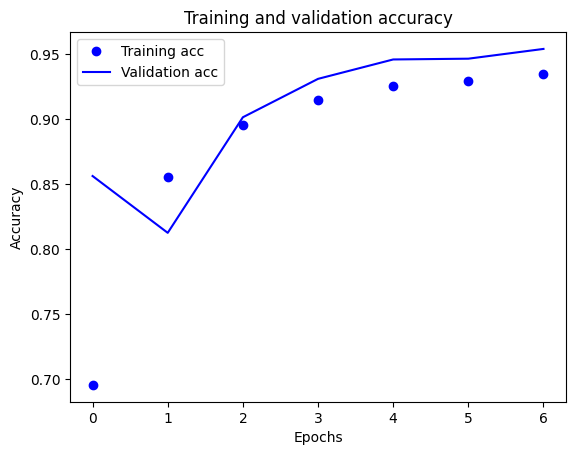

Highest Validation Accuracy:  0.9538499712944031


In [20]:
#64 unit Layers
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6205 - loss: 1.4327 - val_accuracy: 0.7686 - val_loss: 0.6509
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8267 - loss: 0.4439 - val_accuracy: 0.9060 - val_loss: 0.4166
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8698 - loss: 0.3437 - val_accuracy: 0.9011 - val_loss: 0.3834
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8972 - loss: 0.2821 - val_accuracy: 0.8580 - val_loss: 0.5500
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9088 - loss: 0.2605 - val_accuracy: 0.9456 - val_loss: 0.2844
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9161 - loss: 0.2421 - val_accuracy: 0.9528 - val_loss: 0.2096
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9260 - loss: 0.2241 - val_accuracy: 0.9211 - val_loss: 0.3054
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9309 - loss: 0.2120 

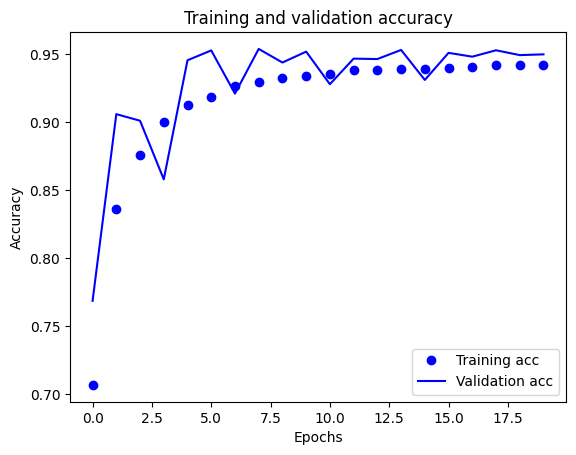

Highest Validation Accuracy:  0.9538999795913696


In [41]:
#64 unit Layers
#1 Intermediate Layer
stellar_model(1, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6117 - loss: 1.6630 - val_accuracy: 0.8772 - val_loss: 0.3145
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8536 - loss: 0.3567 - val_accuracy: 0.8846 - val_loss: 0.3010
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8980 - loss: 0.2791 - val_accuracy: 0.9214 - val_loss: 0.2225
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9178 - loss: 0.2409 - val_accuracy: 0.9412 - val_loss: 0.1886
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9239 - loss: 0.2257 - val_accuracy: 0.9446 - val_loss: 0.1677
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9298 - loss: 0.2166 - val_accuracy: 0.9424 - val_loss: 0.1913
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9341 - loss: 0.2094 - val_accuracy: 0.9369 - val_loss: 0.2377


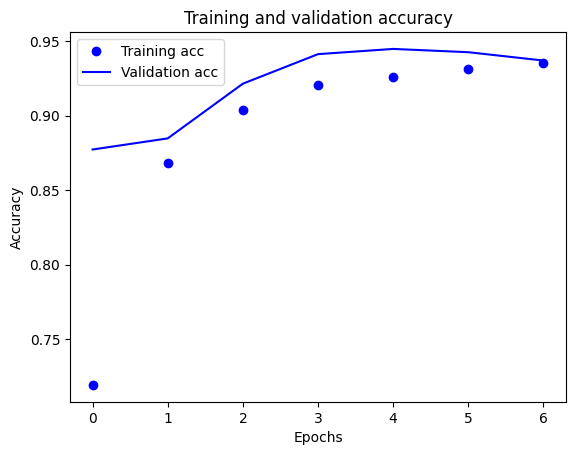

Highest Validation Accuracy:  0.9446499943733215


In [21]:
#128 unit Layers
stellar_model(2, 128, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5837 - loss: 1.3017 - val_accuracy: 0.6316 - val_loss: 0.9008
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6141 - loss: 0.9073 - val_accuracy: 0.4477 - val_loss: 0.9848
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6330 - loss: 0.8512 - val_accuracy: 0.6043 - val_loss: 0.9843
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6367 - loss: 0.8393 - val_accuracy: 0.6922 - val_loss: 0.7835
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6536 - loss: 0.7991 - val_accuracy: 0.6432 - val_loss: 0.8812
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6705 - loss: 0.7596 - val_accuracy: 0.6902 - val_loss: 0.7388
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6903 - loss: 0.7336 - val_accuracy: 0.7027 - val_loss: 0.7485


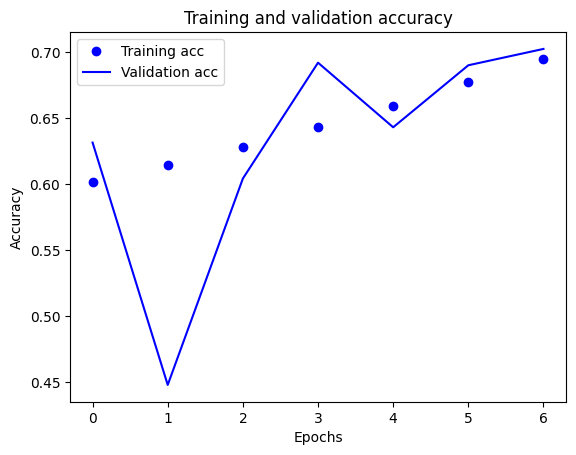

Highest Validation Accuracy:  0.7026500105857849


In [25]:
stellar_model(2, 64, "SGD", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to SGD https://keras.io/api/optimizers/sgd/

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6706 - loss: 1.1404 - val_accuracy: 0.8895 - val_loss: 0.5658
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8710 - loss: 0.3317 - val_accuracy: 0.9143 - val_loss: 0.5886
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9067 - loss: 0.2611 - val_accuracy: 0.8924 - val_loss: 0.5281
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9195 - loss: 0.2273 - val_accuracy: 0.8450 - val_loss: 0.5600
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9309 - loss: 0.2046 - val_accuracy: 0.9295 - val_loss: 0.3629
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9378 - loss: 0.1882 - val_accuracy: 0.9482 - val_loss: 0.3379
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9407 - loss: 0.1779 - val_accuracy: 0.9469 - val_loss: 0.3620


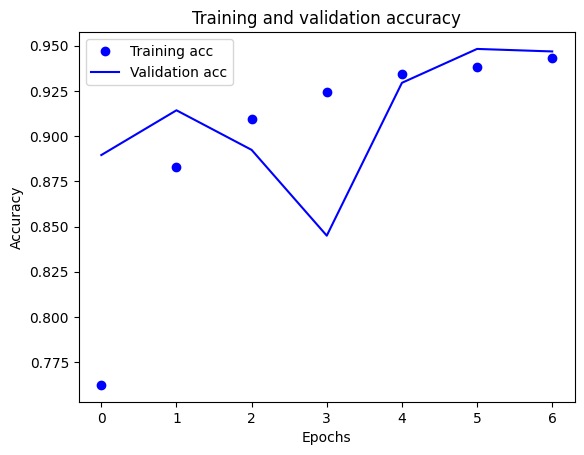

Highest Validation Accuracy:  0.9482499957084656


In [26]:
stellar_model(2, 64, "Adam", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to Adam


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5466 - loss: 1.4102 - val_accuracy: 0.6120 - val_loss: 1.0370
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6190 - loss: 0.8609 - val_accuracy: 0.6266 - val_loss: 0.9692
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6574 - loss: 0.7914 - val_accuracy: 0.6814 - val_loss: 0.9150
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6852 - loss: 0.7458 - val_accuracy: 0.7145 - val_loss: 0.8754
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7030 - loss: 0.7160 - val_accuracy: 0.7118 - val_loss: 0.8484
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7163 - loss: 0.6863 - val_accuracy: 0.7340 - val_loss: 0.8277
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7282 - loss: 0.6672 - val_accuracy: 0.7426 - val_loss: 0.8081


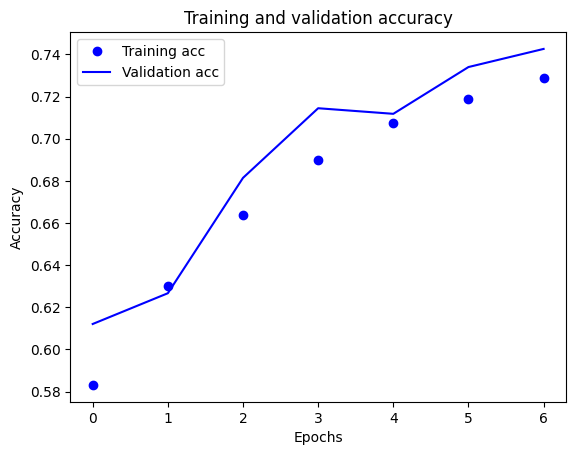

Highest Validation Accuracy:  0.7426000237464905


In [27]:
stellar_model(2, 64, "Adagrad", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to Adagrad

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1549 - loss: 2.9751 - val_accuracy: 0.1329 - val_loss: 2.8374
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1448 - loss: 2.9476 - val_accuracy: 0.1845 - val_loss: 2.8315
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1029 - loss: 2.9295 - val_accuracy: 0.1864 - val_loss: 2.8315
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1052 - loss: 2.9277 - val_accuracy: 0.1758 - val_loss: 2.8315
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1216 - loss: 2.9240 - val_accuracy: 0.1803 - val_loss: 2.8315
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0920 - loss: 2.9304 - val_accuracy: 0.1790 - val_loss: 2.8315
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1007 - loss: 2.9138 - val_accuracy: 0.0264 - val_loss: 2.8315


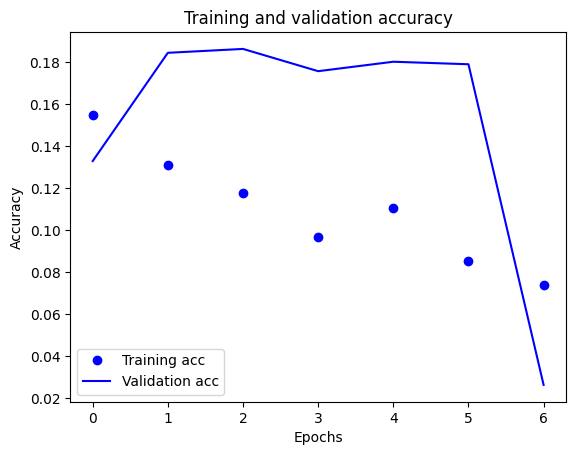

Highest Validation Accuracy:  0.1863500028848648


In [29]:
stellar_model(2, 64, "rmsprop", "mean_squared_error", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1133 - loss: 20.7017 - val_accuracy: 0.0808 - val_loss: 16.6545
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0995 - loss: 16.6367 - val_accuracy: 0.1874 - val_loss: 16.6403
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1160 - loss: 16.6356 - val_accuracy: 0.2034 - val_loss: 16.6403
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.0840 - loss: 16.6356 - val_accuracy: 0.5088 - val_loss: 16.6403
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0564 - loss: 16.6356 - val_accuracy: 0.0092 - val_loss: 16.6403
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0635 - loss: 16.6356 - val_accuracy: 0.0030 - val_loss: 16.6403
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0530 - loss: 16.6356 - val_accuracy: 4.5000e-04 - val_loss: 16.6403


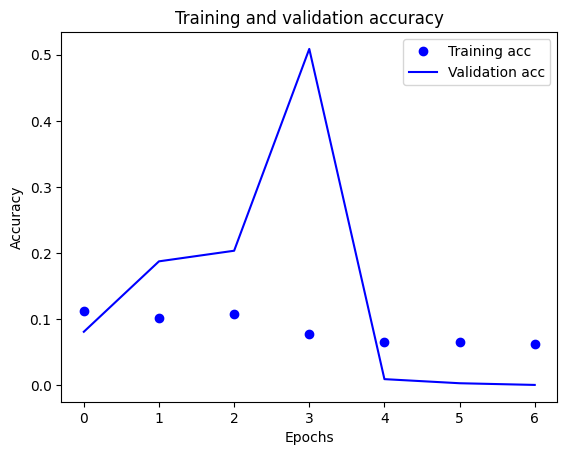

Highest Validation Accuracy:  0.5087500214576721


In [30]:
stellar_model(2, 64, "rmsprop", "kld", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0000e+00 - loss: 1.5061 - val_accuracy: 0.0000e+00 - val_loss: 1.4782
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0000e+00 - loss: 1.5018 - val_accuracy: 0.0000e+00 - val_loss: 1.4782
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.0000e+00 - loss: 1.4972 - val_accuracy: 0.0000e+00 - val_loss: 1.4782
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0000e+00 - loss: 1.4963 - val_accuracy: 0.0000e+00 - val_loss: 1.4782
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0000e+00 - loss: 1.5041 - val_accuracy: 0.0000e+00 - val_loss: 1.4782
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0000e+00 - loss: 1.4970 - val_accuracy: 0.0000e+00 - val_loss: 1.4782
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0000e+00 - loss: 1.5010 - val_accuracy: 0.0000e+00 - val_loss: 1.4782


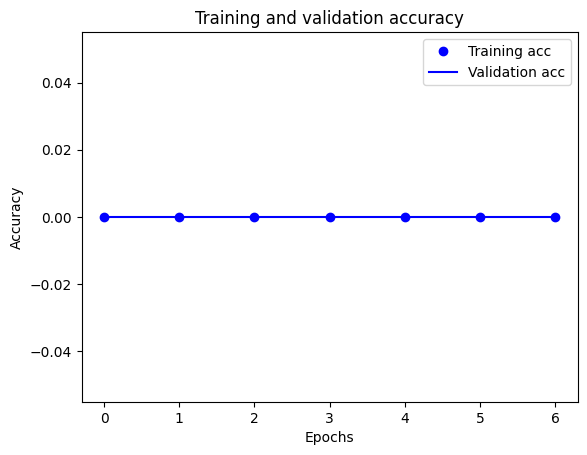

Highest Validation Accuracy:  0.0


In [31]:
stellar_model(2, 64, "rmsprop", "mean_absolute_error", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6056 - loss: 1.2065 - val_accuracy: 0.8461 - val_loss: 0.3454
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8414 - loss: 0.3804 - val_accuracy: 0.8870 - val_loss: 0.2925
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8818 - loss: 0.3100 - val_accuracy: 0.9223 - val_loss: 0.2239
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9019 - loss: 0.2732 - val_accuracy: 0.9313 - val_loss: 0.1980
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9139 - loss: 0.2523 - val_accuracy: 0.9263 - val_loss: 0.2475
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9179 - loss: 0.2419 - val_accuracy: 0.9513 - val_loss: 0.1690
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9255 - loss: 0.2244 - val_accuracy: 0.9487 - val_loss: 0.1623


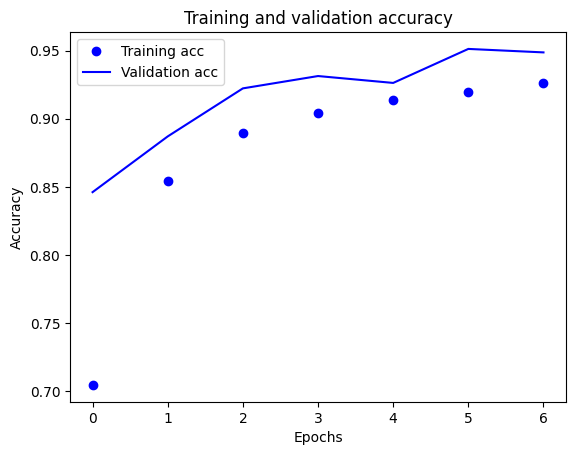

Highest Validation Accuracy:  0.9512500166893005


In [33]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 32)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 32

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 69s 18ms/step - accuracy: 0.5850 - loss: 1.3031 - val_accuracy: 0.7781 - val_loss: 0.7069
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8291 - loss: 0.4088 - val_accuracy: 0.9070 - val_loss: 0.4804
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8842 - loss: 0.3053 - val_accuracy: 0.9208 - val_loss: 0.2614
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9041 - loss: 0.2614 - val_accuracy: 0.9010 - val_loss: 0.2714
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9180 - loss: 0.2444 - val_accuracy: 0.9436 - val_loss: 0.1760
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9270 - loss: 0.2201 - val_accuracy: 0.9414 - val_loss: 0.2175
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9317 - loss: 0.2085 - val_accuracy: 0.9155 - val_loss: 0.3048


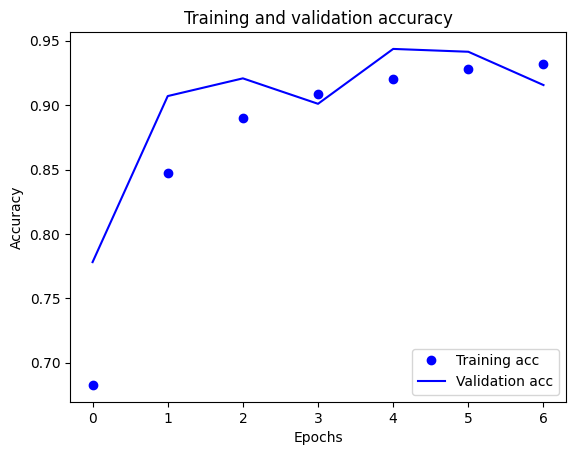

Highest Validation Accuracy:  0.9435999989509583


In [34]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 128)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 128

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5979 - loss: 1.3725 - val_accuracy: 0.7850 - val_loss: 0.4834
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8350 - loss: 0.3951 - val_accuracy: 0.7651 - val_loss: 0.8651
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8862 - loss: 0.2941 - val_accuracy: 0.9147 - val_loss: 0.2268
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9079 - loss: 0.2559 - val_accuracy: 0.9129 - val_loss: 0.2379
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9184 - loss: 0.2352 - val_accuracy: 0.8523 - val_loss: 0.3355
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9256 - loss: 0.2205 - val_accuracy: 0.9441 - val_loss: 0.1740
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9321 - loss: 0.2100 - val_accuracy: 0.9495 - val_loss: 0.1708


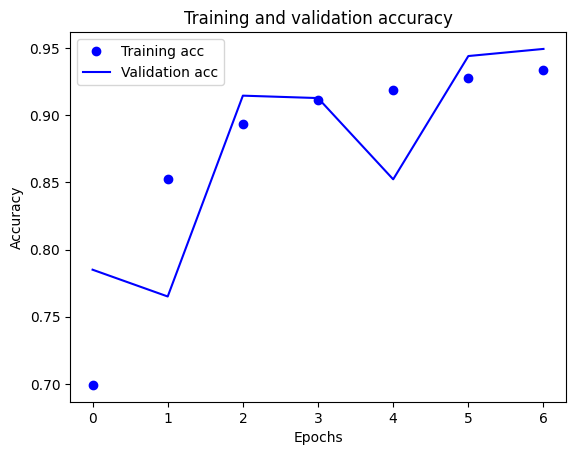

Highest Validation Accuracy:  0.9494500160217285


In [36]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 256)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 256

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6045 - loss: 1.2243 - val_accuracy: 0.8278 - val_loss: 0.4031
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8342 - loss: 0.3954 - val_accuracy: 0.8823 - val_loss: 0.2734
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8782 - loss: 0.3127 - val_accuracy: 0.8758 - val_loss: 0.2878
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9032 - loss: 0.2622 - val_accuracy: 0.9399 - val_loss: 0.2013
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9197 - loss: 0.2402 - val_accuracy: 0.9521 - val_loss: 0.1720
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9251 - loss: 0.2240 - val_accuracy: 0.8723 - val_loss: 0.3860
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9305 - loss: 0.2114 - val_accuracy: 0.9510 - val_loss: 0.1617


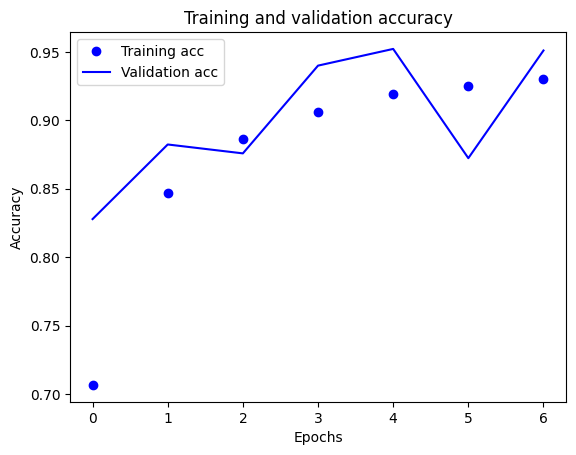

Highest Validation Accuracy:  0.9520999789237976


In [35]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 512)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 512

#Best so far

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6118 - loss: 1.3785 - val_accuracy: 0.8163 - val_loss: 0.5995
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8471 - loss: 0.3741 - val_accuracy: 0.8993 - val_loss: 0.5084
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8877 - loss: 0.2974 - val_accuracy: 0.9144 - val_loss: 0.2980
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9075 - loss: 0.2638 - val_accuracy: 0.8693 - val_loss: 0.2675
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9144 - loss: 0.2499 - val_accuracy: 0.9206 - val_loss: 0.2330
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9205 - loss: 0.2348 - val_accuracy: 0.9060 - val_loss: 0.2291
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9262 - loss: 0.2267 - val_accuracy: 0.9261 - val_loss: 0.2408
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9305 - loss: 0.2163 

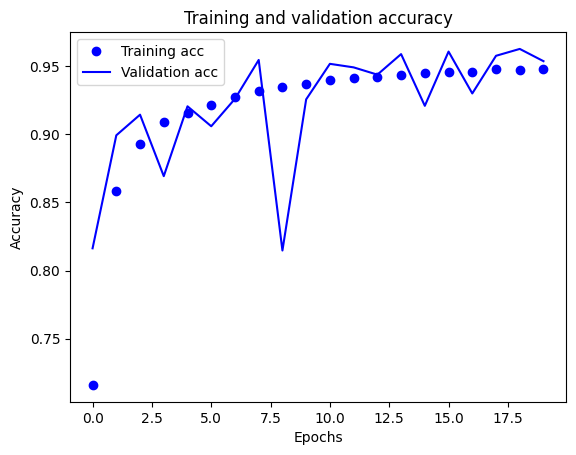

Highest Validation Accuracy:  0.9627500176429749


In [37]:
#64 unit Layers
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

In [ ]:
print("test")

In [ ]:
print("test")

### **NOTES**

losses:
- [categorical_crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) does not work (bc of inherent loss or error in code?)